# Task 3: Neural Networks with TensorFlow/Keras

### Description: Build and train a simple feed-forward neural network to classify images or structured data

- Load a dataset (e.g., MNIST digits or a structured dataset) and preprocess it.
- Design a neural network architecture using TensorFlow or Keras.
- Train the model using backpropagation and evaluate it using accuracy and loss curves.
- Tune hyperparameters (e.g., learning rate, batch size) to improve performance.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Design the Neural Network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Training with Backpropagation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8700 - loss: 0.4491 - val_accuracy: 0.9640 - val_loss: 0.1188
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9655 - loss: 0.1117 - val_accuracy: 0.9718 - val_loss: 0.0958
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9780 - loss: 0.0705 - val_accuracy: 0.9662 - val_loss: 0.1055
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.9757 - val_loss: 0.0807
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9859 - loss: 0.0419 - val_accuracy: 0.9792 - val_loss: 0.0705
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9817 - val_loss: 0.0710
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9916 - loss: 0.0268 - val_accuracy: 0.9795 - val_loss: 0.0746
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9928 - loss: 0.0204 - 

In [7]:
import matplotlib.pyplot as plt

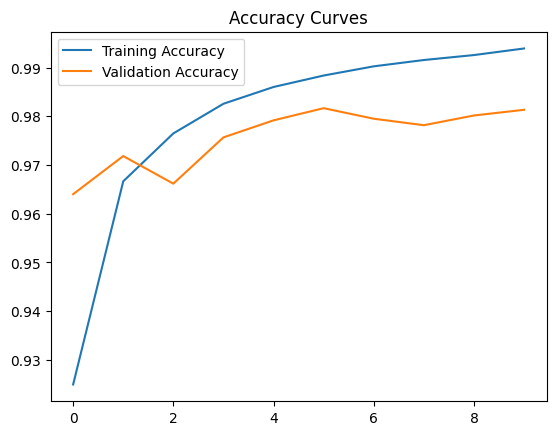

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.0976
Test Accuracy: 0.9780


In [8]:
# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()

# Final evaluation on unseen test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Hyperparaneter Turning

In [10]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.2 MB/s eta 0:00:00


In [11]:
import keras_tuner as kt
from tensorflow import keras

In [12]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from [0.01, 0.001, 0.0001]
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

# Initialize the tuner (RandomSearch)
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(x_train, y_train, epochs=5, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Optimal Units: {best_hps.get('units')}")
print(f"Optimal Learning Rate: {best_hps.get('learning_rate')}")


Trial 5 Complete [00h 00m 20s]
val_accuracy: 0.925166666507721

Best val_accuracy So Far: 0.9759166836738586
Total elapsed time: 00h 02m 46s
Optimal Units: 192
Optimal Learning Rate: 0.001
